![Quora-1.png](attachment:Quora-1.png)

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

Log loss, also known as logistic loss or cross-entropy loss, is a performance metric for binary classification models. It measures the uncertainty of the predicted probabilities for each instance by comparing them to the true class labels.

The formula for log loss is:

`-1/n * Σ(y * log(p) + (1 - y) * log(1 - p))`

where `n` is the number of instances, `y` is the true class label (0 or 1), and `p` is the predicted probability of the instance belonging to class 1.

The goal is to minimize the log loss, as a lower log loss indicates a better model. A perfect model would have a log loss of 0, while a random model would have a log loss of approximately 0.693.

Is there anything else you would like to know?

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

Yes, it is common practice to split a dataset into training and test sets in order to evaluate the performance of a machine learning model. The training set is used to train the model, while the test set is used to evaluate its performance on unseen data.

The ratio of the split can vary depending on the size of the dataset and the specific problem. A common approach is to use a 70:30 or 80:20 split, where 70% or 80% of the data is used for training and the remaining 30% or 20% is used for testing.

It's important to ensure that the split is done randomly so that the training and test sets are representative of the overall dataset.

Is there anything else you would like to know?

Yes, you can split your data based on a timestamp if your dataset contains a time-related feature. This is known as a **time-based split**.

In a time-based split, you would first sort your data by the timestamp feature in chronological order. Then, you would split the data into training and test sets based on a specific point in time. For example, you could use data from before a certain date for training and data from after that date for testing.

This approach can be useful when working with time series data or when the goal is to predict future events based on past data. It ensures that the model is trained on past data and evaluated on future data, which can provide a more realistic assessment of its performance.


<h1>3. Exploratory Data Analysis </h1>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

This code is importing several libraries and modules that are commonly used in data analysis and visualization. Here's a brief explanation of each line:

1. `import numpy as np`: This line imports the NumPy library and assigns it the alias `np`. NumPy is a library for working with arrays of data.
2. `import pandas as pd`: This line imports the Pandas library and assigns it the alias `pd`. Pandas is a library for data manipulation and analysis.
3. `import seaborn as sns`: This line imports the Seaborn library and assigns it the alias `sns`. Seaborn is a library for statistical data visualization.
4. `import matplotlib.pyplot as plt`: This line imports the Pyplot module from the Matplotlib library and assigns it the alias `plt`. Pyplot provides a MATLAB-like plotting framework.
5. `from subprocess import check_output`: This line imports the `check_output` function from the `subprocess` module. This function allows you to run shell commands from within Python.
6. `%matplotlib inline`: This line is a Jupyter Notebook magic command that allows Matplotlib plots to be displayed inline within the notebook.
7. `import plotly.offline as py`: This line imports the Plotly Offline module and assigns it the alias `py`. Plotly is a library for creating interactive visualizations.
8. `py.init_notebook_mode(connected=True)`: This line initializes Plotly's notebook mode, which allows Plotly plots to be displayed within Jupyter Notebooks.
9. `import plotly.graph_objs as go`: This line imports the Graph Objects module from Plotly and assigns it the alias `go`. Graph Objects are used to create Plotly plots.
10. `import plotly.tools as tls`: This line imports the Tools module from Plotly and assigns it the alias `tls`.
11. `import os`: This line imports the OS module, which provides functions for interacting with the operating system.
12. `import gc`: This line imports the Garbage Collector module, which provides functions for managing memory in Python.
13. `import re`: This line imports the Regular Expression module, which provides functions for working with regular expressions.
14. `from nltk.corpus import stopwords`: This line imports the stopwords corpus from NLTK (Natural Language Toolkit). Stopwords are common words that are often removed from text data during preprocessing.
15. `import distance`: This line imports the Distance module, which provides functions for calculating distances between strings.
16. `from nltk.stem import PorterStemmer`: This line imports the PorterStemmer class from NLTK. A stemmer reduces words to their base or root form.
17. `from bs4 import BeautifulSoup`: This line imports the BeautifulSoup class from BeautifulSoup4 (bs4). BeautifulSoup is a library for parsing HTML and XML documents.

Is there anything else you would like to know?

<h2> 3.1 Reading data and basic stats </h2>

In [4]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


This code reads a CSV file named "train.csv" into a Pandas DataFrame and then prints the number of data points (rows) in the DataFrame. Here's a brief explanation of each line:

1. `df = pd.read_csv("train.csv")`: This line uses the `read_csv` function from the Pandas library to read the "train.csv" file into a DataFrame. The resulting DataFrame is assigned to the variable `df`.
2. `print("Number of data points:",df.shape[0])`: This line prints a string followed by the number of rows in the DataFrame `df`. The `shape` attribute of a DataFrame returns a tuple representing the dimensions of the DataFrame. The first element of this tuple is the number of rows, so `df.shape[0]` returns the number of rows in `df`.

Is there anything else you would like to know?

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


This appears to be the output of the `df.info()` command for a Pandas DataFrame named `df`. The output provides a summary of the DataFrame, including information about its size, columns, data types, and memory usage.

From the output, we can see that the DataFrame has 404290 rows and 6 columns. The columns are named `id`, `qid1`, `qid2`, `question1`, `question2`, and `is_duplicate`. The data types of the columns are `int64` for the first four columns (`id`, `qid1`, `qid2`, and `is_duplicate`) and `object` for the last two columns (`question1` and `question2`).

The output also shows that there is one missing value in the `question1` column and two missing values in the `question2` column. The memory usage of the DataFrame is 18.5+ MB.



We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

<AxesSubplot:xlabel='is_duplicate'>

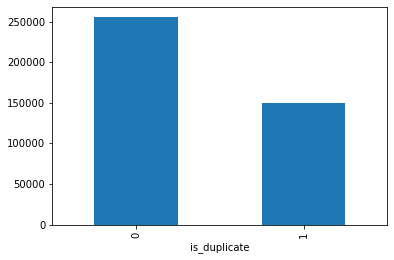

In [8]:
df.groupby("is_duplicate")['id'].count().plot.bar()

This code uses the `groupby` method of a Pandas DataFrame named `df` to group the data by the values in the `is_duplicate` column. Then, it applies the `count` method to the `id` column of each group to count the number of rows in each group. Finally, it uses the `plot.bar` method to create a bar plot of the resulting counts.

Here's a step-by-step explanation of what this code does:

1. `df.groupby("is_duplicate")`: This groups the rows of the DataFrame `df` by the values in the `is_duplicate` column. This creates a `DataFrameGroupBy` object.
2. `['id']`: This selects the `id` column from each group in the `DataFrameGroupBy` object.
3. `.count()`: This applies the `count` method to the selected column (`id`) in each group. This returns a Series containing the number of rows in each group.
4. `.plot.bar()`: This creates a bar plot of the resulting counts using the `plot.bar` method of the Series.

The resulting bar plot shows the number of rows in each group (i.e., the number of rows where `is_duplicate` is 0 and the number of rows where `is_duplicate` is 1).

Is there anything else you would like to know?

In [7]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   404290


In [10]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


This code calculates and prints the percentage of question pairs in a Pandas DataFrame named `df` that are labeled as similar (`is_duplicate` = 1) and not similar (`is_duplicate` = 0).

Here's a step-by-step explanation of what this code does:

1. `df['is_duplicate'].mean()`: This calculates the mean of the `is_duplicate` column in the DataFrame `df`. Since the `is_duplicate` column contains binary values (0 or 1), the mean represents the proportion of rows where `is_duplicate` is 1 (i.e., the proportion of question pairs that are labeled as similar).
2. `round(df['is_duplicate'].mean()*100, 2)`: This multiplies the mean by 100 to convert it to a percentage and rounds it to two decimal places.
3. `100 - round(df['is_duplicate'].mean()*100, 2)`: This subtracts the percentage of similar question pairs from 100 to calculate the percentage of not similar question pairs.
4. `print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))`: This prints a formatted string containing the calculated percentage of not similar question pairs.
5. `print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))`: This prints a formatted string containing the calculated percentage of similar question pairs.

The resulting output shows the percentage of question pairs in the DataFrame that are labeled as similar and not similar.

Is there anything else you would like to know?

<h3> 3.2.2 Number of unique questions </h3>

In [11]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



This code performs several calculations on a Pandas DataFrame named `df` to obtain information about the questions in the `qid1` and `qid2` columns. It calculates the total number of unique questions, the number of unique questions that appear more than once, and the maximum number of times a single question is repeated. The results of these calculations are then printed.

Here's a step-by-step explanation of what this code does:

1. `qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())`: This concatenates the values in the `qid1` and `qid2` columns of the DataFrame `df` into a single Pandas Series named `qids`.
2. `unique_qs = len(np.unique(qids))`: This calculates the number of unique values in the `qids` Series using the `unique` function from NumPy and assigns the result to the variable `unique_qs`.
3. `qs_morethan_onetime = np.sum(qids.value_counts() > 1)`: This calculates the number of unique values in the `qids` Series that appear more than once. The `value_counts` method of the Series returns a Series containing counts of unique values. The resulting Series is then compared to 1 using the `>` operator to create a boolean mask. The mask is passed to the `sum` function from NumPy to count the number of `True` values, which represents the number of unique values that appear more than once. The result is assigned to the variable `qs_morethan_onetime`.
4. `print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))`: This prints a formatted string containing the calculated number of unique questions.
5. `print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))`: This prints a formatted string containing the calculated number of unique questions that appear more than once and their percentage out of all unique questions.
6. `print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))`: This prints a formatted string containing the maximum number of times a single question is repeated. The maximum value is obtained by applying the `max` function to the result of the `value_counts` method applied to the `qids` Series.
7. `q_vals=qids.value_counts()`: This calculates the counts of unique values in the `qids` Series using the `value_counts` method and assigns the resulting Series to the variable `q_vals`.
8. `q_vals=q_vals.values`: This extracts the values from the `q_vals` Series and assigns them to the same variable.


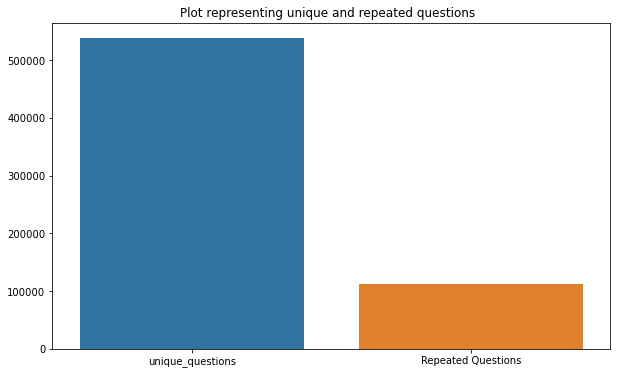

In [13]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x=x,y=y)
plt.show()

This code creates a bar plot using the Seaborn library to visualize the number of unique and repeated questions in a dataset. The `unique_qs` and `qs_morethan_onetime` variables, which were calculated earlier in the code, are used to represent the number of unique and repeated questions, respectively.

Here's a step-by-step explanation of what this code does:

1. `x = ["unique_questions" , "Repeated Questions"]`: This creates a list of strings representing the categories to be plotted on the x-axis of the bar plot.
2. `y =  [unique_qs , qs_morethan_onetime]`: This creates a list of values representing the counts to be plotted on the y-axis of the bar plot. The values are obtained from the `unique_qs` and `qs_morethan_onetime` variables calculated earlier in the code.
3. `plt.figure(figsize=(10, 6))`: This creates a new Matplotlib figure with a specified size using the `figure` function from the Pyplot module of Matplotlib.
4. `plt.title ("Plot representing unique and repeated questions  ")`: This sets the title of the plot using the `title` function from Pyplot.
5. `sns.barplot(x=x,y=y)`: This creates a bar plot using the `barplot` function from Seaborn. The `x` and `y` arguments specify the data to be plotted on the x

<h3>3.2.3 Checking for Duplicates </h3>

In [14]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


This code checks for the presence of duplicate question pairs in a Pandas DataFrame named `df`. It does this by grouping the data by the values in the `qid1` and `qid2` columns and counting the number of rows in each group. The result is then compared to the number of rows in the original DataFrame to determine if there are any duplicate question pairs.

Here's a step-by-step explanation of what this code does:

1. `pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()`: This selects the `qid1`, `qid2`, and `is_duplicate` columns from the DataFrame `df` and groups the resulting DataFrame by the values in the `qid1` and `qid2` columns. The `count` method is then applied to each group to count the number of rows. The resulting DataFrame is then flattened using the `reset_index` method and assigned to the variable `pair_duplicates`.
2. `print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])`: This calculates the difference between the number of rows in the `pair_duplicates` DataFrame and the original `df` DataFrame. Since each row in the `pair_duplicates` DataFrame represents a unique pair of questions, this difference represents the number of duplicate question pairs in the original DataFrame. The result is then printed.

If there are no duplicate question pairs in the original DataFrame, then the calculated difference will be 0.


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



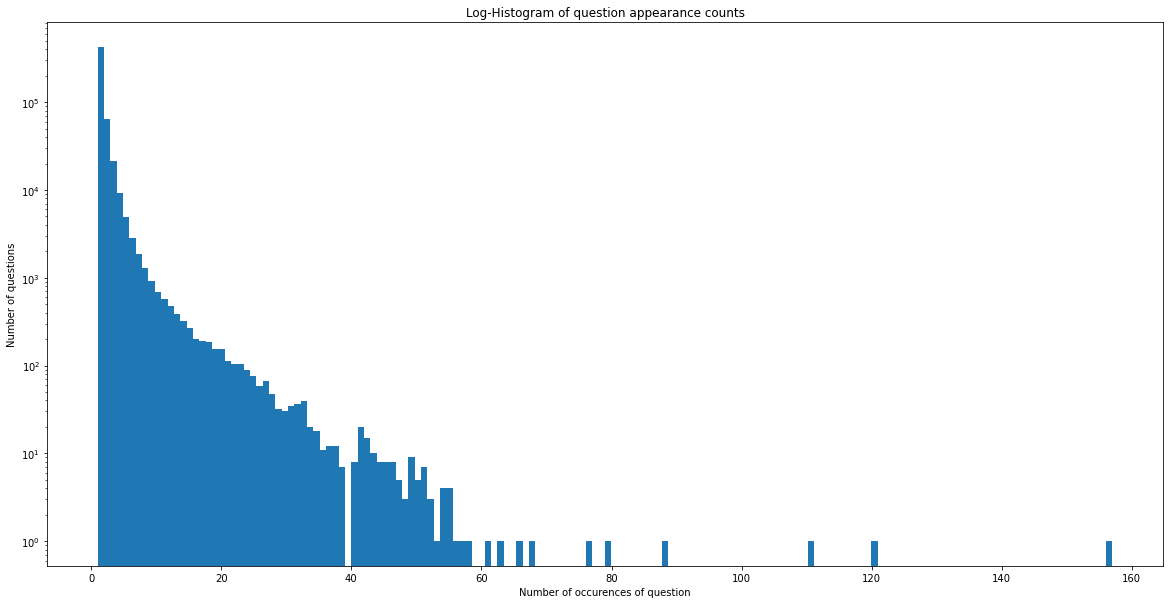

In [17]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonpositive='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

This code creates a histogram using the Matplotlib library to visualize the distribution of the number of times each question appears in a Pandas Series named `qids`. The `qids` Series was created earlier in the code by concatenating the values in the `qid1` and `qid2` columns of a DataFrame.

Here's a step-by-step explanation of what this code does:

1. `plt.figure(figsize=(20, 10))`: This creates a new Matplotlib figure with a specified size using the `figure` function from the Pyplot module of Matplotlib.
2. `plt.hist(qids.value_counts(), bins=160)`: This creates a histogram using the `hist` function from Pyplot. The data for the histogram is obtained by applying the `value_counts` method to the `qids` Series to calculate the counts of unique values. The `bins` argument specifies the number of bins to use in the histogram.
3. `plt.yscale('log', nonpositive='clip')`: This sets the y-axis scale to logarithmic using the `yscale` function from Pyplot. The `nonpositive` argument specifies how to handle non-positive values.
4. `plt.title('Log-Histogram of question appearance counts')`: This sets the title of the plot using the `title` function from Pyplot.
5. `plt.xlabel('Number of occurences of question')`: This sets the label of the x-axis using the `xlabel` function from Pyplot.
6. `plt.ylabel('Number of questions')`: This sets the label of the y-axis using the `ylabel` function from Pyplot.
7. `print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))`: This prints a formatted string containing the maximum number of times a single question is repeated. The maximum value is obtained by applying the `max` function to the result of the `value_counts` method applied to the `qids` Series.

The resulting histogram shows the distribution of the number of times each question appears in the dataset.

Is there anything else you would like to know?

<h3> 3.2.5 Checking for NULL values </h3>

In [18]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


- There are two rows with null values in question2 

In [19]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


This code fills any missing values in a Pandas DataFrame named `df` with empty strings. It then checks for the presence of any remaining missing values and prints any rows that contain missing values.

Here's a step-by-step explanation of what this code does:

1. `df = df.fillna('')`: This fills any missing values in the DataFrame `df` with empty strings using the `fillna` method. The resulting DataFrame is assigned back to the variable `df`.
2. `nan_rows = df[df.isnull().any(1)]`: This creates a boolean mask by applying the `isnull` method to the DataFrame `df` to check for missing values, followed by the `any` method with an argument of 1 to check for rows that contain at least one missing value. The resulting mask is used to index the DataFrame `df` to select only the rows that contain missing values. The resulting DataFrame is assigned to the variable `nan_rows`.
3. `print (nan_rows)`: This prints the `nan_rows` DataFrame, which contains any rows from the original DataFrame that still contain missing values after filling.

Since all missing values were filled with empty strings in the first step, the resulting `nan_rows` DataFrame should be empty.

Is there anything else you would like to know?

<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

This text describes several features that can be constructed from a dataset containing pairs of questions. These features can be used to represent the data in a machine learning model. Here's a brief explanation of each feature:

1. `freq_qid1`: This feature represents the frequency of the first question in each pair (`qid1`).
2. `freq_qid2`: This feature represents the frequency of the second question in each pair (`qid2`).
3. `q1len`: This feature represents the length of the first question in each pair (`question1`).
4. `q2len`: This feature represents the length of the second question in each pair (`question2`).
5. `q1_n_words`: This feature represents the number of words in the first question in each pair (`question1`).
6. `q2_n_words`: This feature represents the number of words in the second question in each pair (`question2`).
7. `word_Common`: This feature represents the number of common unique words between the two questions in each pair.
8. `word_Total`: This feature represents the total number of words in both questions in each pair.
9. `word_share`: This feature represents the ratio of common unique words to the total number of words in both questions.
10. `freq_q1+freq_q2`: This feature represents the sum of the frequencies of the first and second questions in each pair (`qid1` and `qid2`).
11. `freq_q1-freq_q2`: This feature represents the absolute difference between the frequencies of the first and second questions in each pair (`qid1` and `qid2`).

These features can provide useful information about the relationship between the two questions in each pair and can help a machine learning model to predict whether they are duplicates or not.

Is there anything else you would like to know?

In [20]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


Here is an explanation of the code line by line:

1. `if os.path.isfile('df_fe_without_preprocessing_train.csv'):` This line checks if a file named `df_fe_without_preprocessing_train.csv` exists in the current working directory using the `isfile()` method from the `os.path` module.

2. `df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')` If the file exists, this line reads it into a DataFrame `df` using the `read_csv()` method from the `pandas` library. The `encoding` parameter is set to `'latin-1'`.

3. `else:` If the file does not exist, the code enters the else block and performs several operations on the DataFrame `df`.

4. `df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')` This line creates a new column in the DataFrame named `freq_qid1`. The values in this column are calculated by grouping the rows in the DataFrame by the values in the `qid1` column and counting the number of occurrences of each value.

5. `df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')` This line is similar to the previous one but creates a new column named `freq_qid2` based on the values in the `qid2` column.

6. `df['q1len'] = df['question1'].str.len()` This line creates a new column named `q1len` that contains the length of each string in the `question1` column.

7. `df['q2len'] = df['question2'].str.len()` This line is similar to the previous one but creates a new column named `q2len` based on the values in the `question2` column.

8. `df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))` This line creates a new column named `q1_n_words` that contains the number of words in each string in the `question1` column. The number of words is calculated by splitting each string on spaces and counting the resulting list of words.

9. `df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))` This line is similar to the previous one but creates a new column named `q2_n_words` based on the values in the `question2` column.

10-18. These lines define three functions: `normalized_word_Common()`, `normalized_word_Total()`, and `normalized_word_share()`. Each function takes a row of the DataFrame as input and returns a value based on calculations performed on that row. The first function calculates the number of common words between two questions, normalized by dividing by 1.0. The second function calculates the total number of words in two questions, normalized by dividing by 1.0. The third function calculates the normalized word share between two questions.

19. `df['word_Common'] = df.apply(normalized_word_Common, axis=1)` This line applies the first function to each row of the DataFrame and stores the result in a new column named `word_Common`.

20. `df['word_Total'] = df.apply(normalized_word_Total, axis=1)` This line applies the second function to each row of the DataFrame and stores the result in a new column named `word_Total`.

21. `df['word_share'] = df.apply(normalized_word_share, axis=1)` This line applies the third function to each row of the DataFrame and stores the result in a new column named `word_share`.

22. `df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']` This line creates a new column named `

<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [21]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


Here's a line by line explanation of the code you provided:

```python
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))
```
This line prints the minimum length of the questions in column 'q1_n_words' of dataframe 'df'.

```python
print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))
```
This line prints the minimum length of the questions in column 'q2_n_words' of dataframe 'df'.

```python
print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
```
This line prints the number of questions with minimum length [question1] in column 'q1_n_words' of dataframe 'df'.

```python
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])
```
This line prints the number of questions with minimum length [question2] in column 'q2_n_words' of dataframe 'df'.



<h4> 3.3.1.1 Feature: word_share </h4>

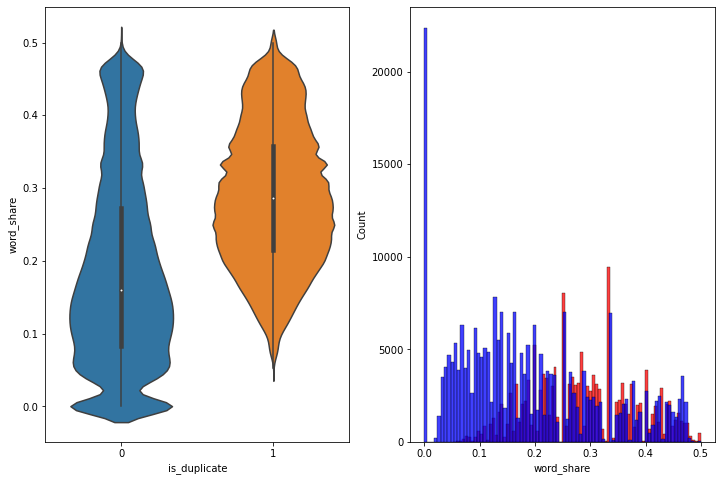

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.histplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.histplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

This code is written in Python and uses the Seaborn library to create a violin plot and a histogram plot side by side. The first line sets the size of the figure to be 12 inches by 8 inches using `plt.figure(figsize=(12, 8))`. The next line creates a subplot with two plots side by side using `plt.subplot(1,2,1)`. The first plot is a violin plot created using `sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])`. The second plot is a histogram plot created using `sns.histplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red') sns.histplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )`. Finally, `plt.show()` is used to display the plots¹².


- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

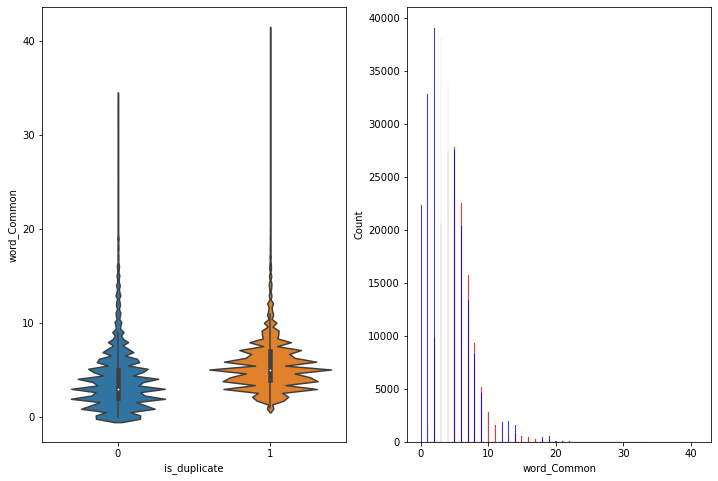

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.histplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.histplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>